In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
plt.rcParams["figure.figsize"] = (14, 8)

In [2]:
df = pd.read_csv("../data/Flood Prediction Dataset/train.csv")

In [3]:
df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [4]:
df.dtypes

id                                   int64
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

In [5]:
df.isna().mean()

id                                 0.0
MonsoonIntensity                   0.0
TopographyDrainage                 0.0
RiverManagement                    0.0
Deforestation                      0.0
Urbanization                       0.0
ClimateChange                      0.0
DamsQuality                        0.0
Siltation                          0.0
AgriculturalPractices              0.0
Encroachments                      0.0
IneffectiveDisasterPreparedness    0.0
DrainageSystems                    0.0
CoastalVulnerability               0.0
Landslides                         0.0
Watersheds                         0.0
DeterioratingInfrastructure        0.0
PopulationScore                    0.0
WetlandLoss                        0.0
InadequatePlanning                 0.0
PoliticalFactors                   0.0
FloodProbability                   0.0
dtype: float64

In [6]:
len(df)

1117957

In [7]:
X = df.drop(["FloodProbability", "id"], axis=1)
y = df["FloodProbability"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [9]:
cb = CatBoostRegressor()

In [10]:
cb.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True, verbose=False);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [11]:
y_preds = cb.predict(X_test)

In [12]:
r2_score(y_test, y_preds)

0.8463644371941204

In [65]:
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": cb.feature_importances_
})

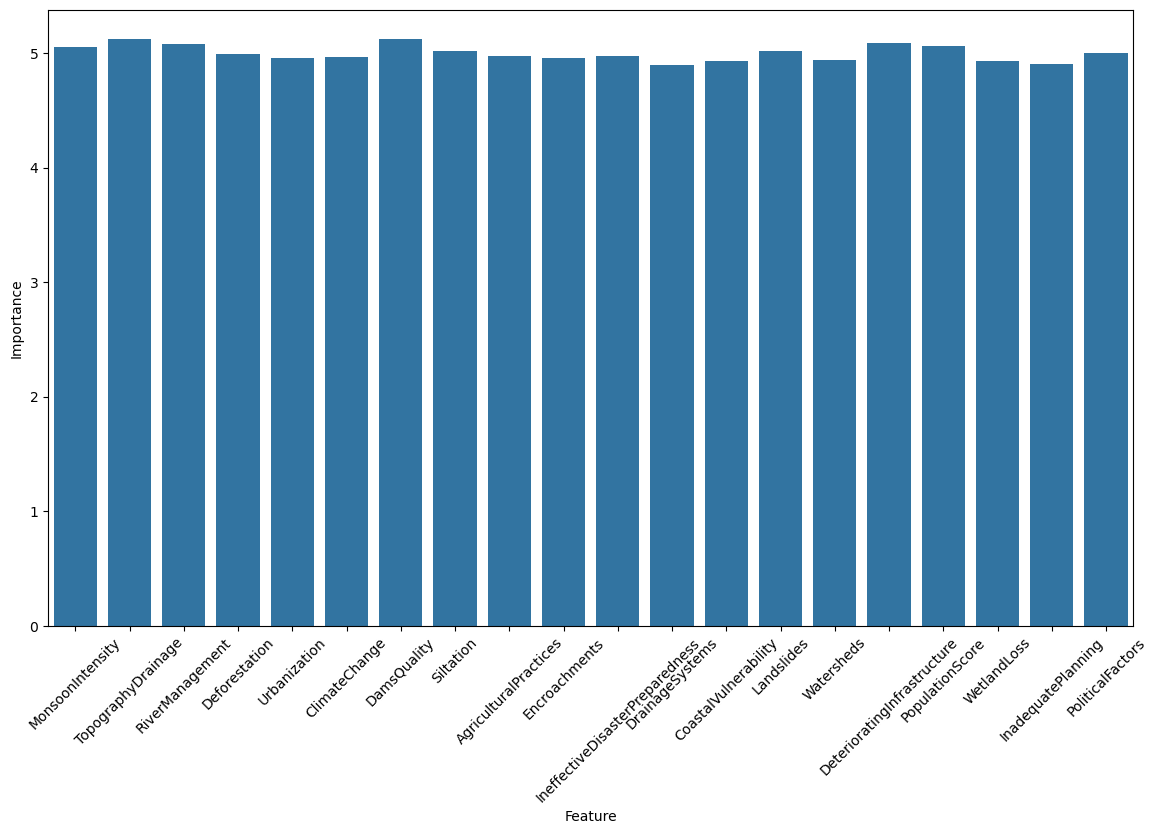

In [76]:
sns.barplot(data=feature_importances, x="Feature", y="Importance", )
plt.xticks(rotation=45);